Importing Useful Libraries

In [3]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xmltodict
from collections import Counter

import torch
from torchvision import datasets, transforms, models
from torch.utils.data import dataset
from PIL import Image


Annotation and Images Extraction

In [17]:
images = 'face-mask-detection/images/'
annotations = 'face-mask-detection/annotations/'

In [18]:
img_names = []
xml_names = []
for dirname, _, filenames in os.walk('face-mask-detection'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:] != 'xml':
            img_names.append(filename)
        else:
            xml_names.append(filename)

In [19]:
listing = []
for i in img_names[:]:
    with open(annotations + i[:-4] + '.xml') as fd:
        doc = xmltodict.parse(fd.read())
    temp = doc['annotation']['object']
    if type(temp) == list:
        for i in range(len(temp)):
            listing.append(temp[i]['name'])
    else:
        listing.append(temp['name'])

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items, '\n', values)

dict_keys(['without_mask', 'with_mask', 'mask_weared_incorrect']) 
 dict_values([717, 3232, 123])


Visualisation and Analysis

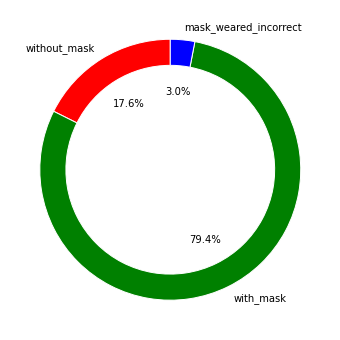

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.pie(values, wedgeprops = dict(width=0.2, edgecolor='w'), labels=Items, colors=['r', 'g', 'b'], startangle=90, autopct='%1.1f%%')
plt.show()

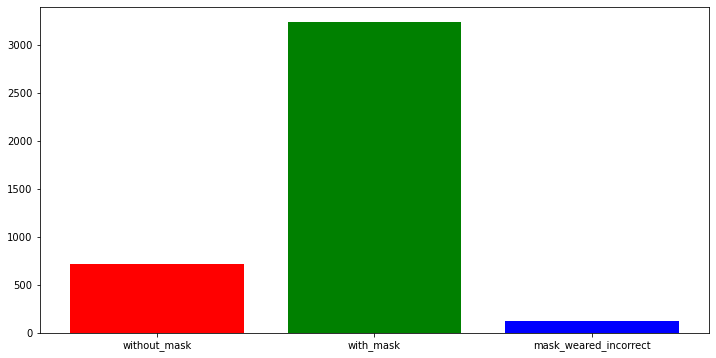

In [21]:
fig, ax = plt.subplots(figsize = (12, 6))
ax = plt.bar(Items, list(values), color=['red', 'green', 'blue'])
plt.show()

Images Identification

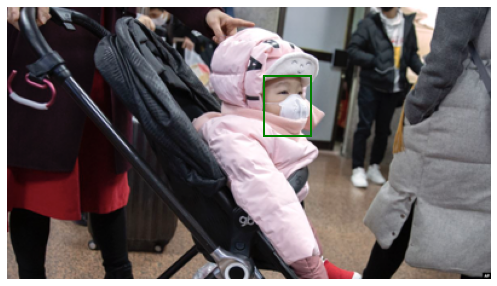

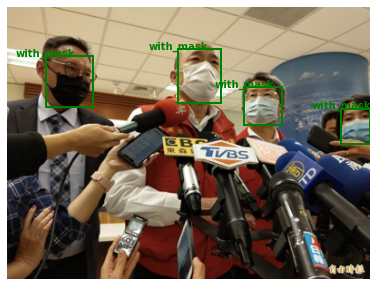

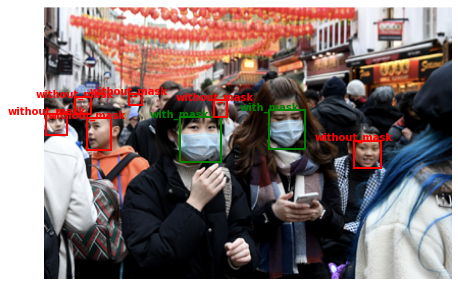

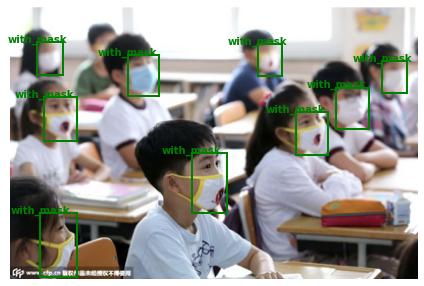

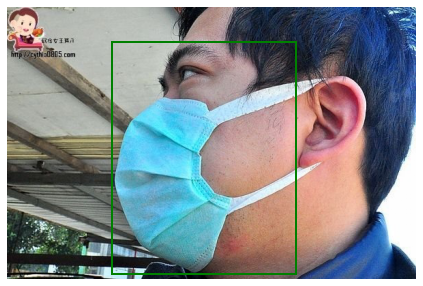

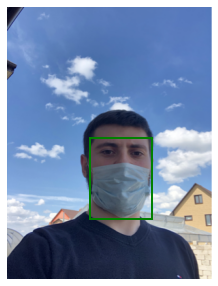

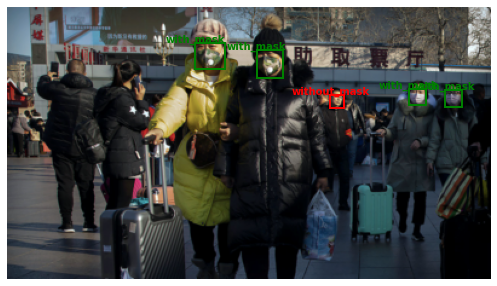

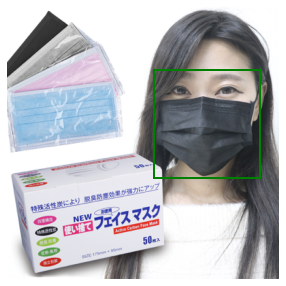

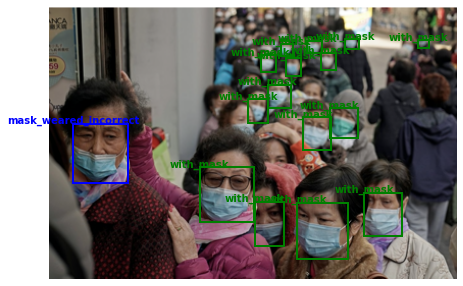

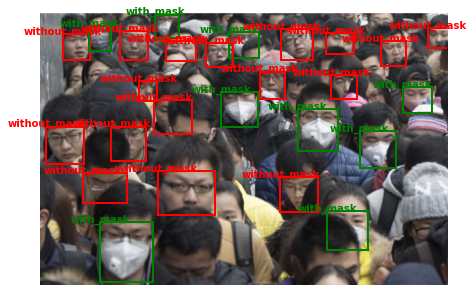

In [25]:
def face_check(img): 
    with open(annotations + img[:-4] + '.xml') as fd:
        doc = xmltodict.parse(fd.read())
    image = plt.imread(os.path.join(images + img))
    fig, ax = plt.subplots(1)
    ax.axis('off')
    fig.set_size_inches(10, 5)
    temp = doc['annotation']['object']
    if type(temp) == list:
        for i in range(len(temp)):
            #with_mask
            if temp[i]['name'] == 'with_mask':
                x, y, w, h = list(map(int, temp[i]['bndbox'].values()))
                mpatch = mpatches.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='g', facecolor='none', lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate('with_mask', (rx, ry), color='green', weight='bold', fontsize=10, ha='center', va='baseline')
            #without_mask
            if temp[i]['name'] == 'without_mask':
                x, y, w, h = list(map(int, temp[i]['bndbox'].values()))     
                mpatch = mpatches.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none', lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate('without_mask', (rx, ry), color='red', weight='bold', fontsize=10, ha='center', va='baseline')
            #mask_weared_incorrect
            if temp[i]['name'] == 'mask_weared_incorrect':
                x, y, w, h = list(map(int, temp[i]['bndbox'].values()))
                mpatch = mpatches.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='b', facecolor='none', lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate('mask_weared_incorrect', (rx, ry), color='blue', weight='bold', fontsize=10, ha='center', va='baseline')
    else:
        x, y, w, h = list(map(int, temp['bndbox'].values()))
        edgecolor = {'with_mask': 'g', 'without_mask': 'r', 'mask_weared_incorrect': 'b'}
        mpatch = mpatches.Rectangle((x, y), w - x, h - y, lw=2, edgecolor = edgecolor[temp['name']], facecolor='none',)
    ax.imshow(image)
    ax.add_patch(mpatch)

func_img = img_names.copy()
for i in range(5, 15):
    face_check(func_img[i])
